<a href="https://colab.research.google.com/github/junwzm/study/blob/master/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Activation, Dropout


In [4]:

def load_data(filename, time_step):
    '''
    filename: 
    instruction: file address, note '/'

    time_step: int
    instruction: how many previous samples are used to predict the next sample, it is the same with the time_steps of that in LSTM
    '''
    df = pd.read_csv(filename, header=None)
    data = df.values
    data = data.astype('float32')  # confirm the type as 'float32'
    data = data.reshape(data.shape[0], )
    # plt.title('original data')
    # plt.plot(data)
    # plt.savefig('original data.png')
    # plt.show()
    # using a list variable to rebuild a dataset to store previous time_step samples and another predicted sample
    result = []
    for index in range(len(data) - time_step):
        result.append(data[index:index + time_step + 1])
    
    # variable 'result' can be (len(data)-time_step) * (time_step + 1), the last column is predicted sample.
    return np.array(result)

def plot_curve(true_data, predicted_data):
    '''
    true_data: float32
    instruction: the true test data
    predicted_data: float32
    instruction: the predicted data from the model
    '''
    plt.plot(true_data, label='True data')
    plt.plot(predicted_data, label='Predicted data')
    plt.legend()
    plt.savefig('result.png')
    plt.show()
def build_model(layer):
    '''
    layer: list
    instruction: the number of neurons in each layer
    '''
    model = Sequential()
    # set the first hidden layer and set the input dimension
    model.add(LSTM(
        input_shape=(1, layer[0]), units=layer[1], return_sequences=True
    ))
    model.add(Dropout(0.2))

    # add the second layer
    model.add(LSTM(
        units=layer[2], return_sequences=False
    ))
    model.add(Dropout(0.2))

    # add the output layer with a Dense
    model.add(Dense(units=layer[3], activation='linear'))
    model.compile(loss='mse', optimizer='adam')

    return model

In [13]:
data = load_data("shizhijiaquan.csv", 50)


In [14]:

# normalize the data and split it into train and test set
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)
dataset.shape

(2141, 51)

In [15]:

# define a variable to represent the ratio of train/total and split the dataset
train_count = int(0.7 * len(dataset))
x_train_set, x_test_set = dataset[:train_count, :-1], dataset[train_count:, :-1]
y_train_set, y_test_set = dataset[:train_count, -1], dataset[train_count:, -1]

# reshape the data to satisfy the input acquirement of LSTM
x_train_set = x_train_set.reshape(x_train_set.shape[0], 1, x_train_set.shape[1])
x_test_set = x_test_set.reshape(x_test_set.shape[0], 1, x_test_set.shape[1])
y_train_set = y_train_set.reshape(y_train_set.shape[0], 1)
y_test_set = y_test_set.reshape(y_test_set.shape[0], 1)
print(x_train_set.shape)
print(y_train_set.shape)

(1498, 1, 50)
(1498, 1)


# 新段落

In [16]:
# train the model and use the validation part to validate
layer11=[x_train_set.shape[2],32,32,y_train_set.shape[1]]
model=build_model(layer11)
model.fit(x_train_set, y_train_set, batch_size=128, epochs=20, validation_split=0.2)

# do the prediction
y_predicted = model.predict(x_test_set)

Epoch 1/20
10/10 [==============================] - 34s 103ms/step - loss: 0.1864 - val_loss: 0.1018
Epoch 2/20
10/10 [==============================] - 0s 7ms/step - loss: 0.0789 - val_loss: 0.0149
Epoch 3/20
10/10 [==============================] - 0s 7ms/step - loss: 0.0192 - val_loss: 0.0048
Epoch 4/20
10/10 [==============================] - 0s 7ms/step - loss: 0.0192 - val_loss: 0.0012
Epoch 5/20
10/10 [==============================] - 0s 9ms/step - loss: 0.0141 - val_loss: 0.0032
Epoch 6/20
10/10 [==============================] - 0s 9ms/step - loss: 0.0153 - val_loss: 0.0016
Epoch 7/20
10/10 [==============================] - 0s 7ms/step - loss: 0.0124 - val_loss: 0.0011
Epoch 8/20
10/10 [==============================] - 0s 7ms/step - loss: 0.0127 - val_loss: 0.0015
Epoch 9/20
10/10 [==============================] - 0s 8ms/step - loss: 0.0132 - val_loss: 0.0017
Epoch 10/20
10/10 [==============================] - 0s 7ms/step - loss: 0.0118 - val_loss: 0.0010
Epoch 11/20
10/1

In [17]:
y_predicted

array([[0.59477603],
       [0.5968258 ],
       [0.60161066],
       [0.60542923],
       [0.6091371 ],
       [0.6134675 ],
       [0.615162  ],
       [0.6179624 ],
       [0.6182637 ],
       [0.6199671 ],
       [0.61891705],
       [0.6196278 ],
       [0.62102073],
       [0.62185436],
       [0.6225918 ],
       [0.621614  ],
       [0.62152743],
       [0.6201099 ],
       [0.6193546 ],
       [0.6199419 ],
       [0.62400264],
       [0.62798864],
       [0.63231117],
       [0.63689685],
       [0.6380572 ],
       [0.6390913 ],
       [0.6398878 ],
       [0.6393839 ],
       [0.63995314],
       [0.63987976],
       [0.6386686 ],
       [0.6381814 ],
       [0.63853294],
       [0.6373615 ],
       [0.6365795 ],
       [0.6334222 ],
       [0.6316998 ],
       [0.62959224],
       [0.6289426 ],
       [0.6288957 ],
       [0.62983924],
       [0.6308541 ],
       [0.630446  ],
       [0.63081527],
       [0.62945026],
       [0.6294795 ],
       [0.6305291 ],
       [0.630

In [18]:
# plot the predicted curve and the original curve
# fill some zeros to get a (len, 51) array
temp = np.zeros((len(y_test_set), 50))
origin_temp = np.hstack((temp, y_test_set))
predict_temp = np.hstack((temp, y_predicted))
origin_temp


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.64384043],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.65694821],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.6640228 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.12528908],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.10123265],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.12002146]])

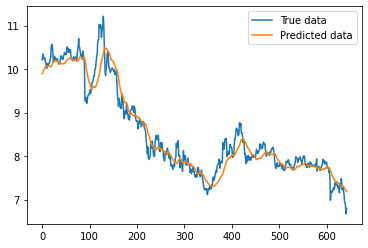

In [19]:

# tranform the data back to the original one
origin_test = scaler.inverse_transform(origin_temp)
predict_test = scaler.inverse_transform(predict_temp)

plot_curve(origin_test[:, -1], predict_test[:, -1])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import newaxis
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
import os
 
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
 
step = 0.15
steps = 750
x = np.arange(0, steps, step)
data = np.sin(x)
print(data)
SEQ_LENGTH = 100
sequence_length = SEQ_LENGTH + 1
result = []
 
for index in range(len(data) - sequence_length):
    result.append(data[index: index + sequence_length])
result = np.array(result)
 
row = round(0.9 * result.shape[0])
row

[0.         0.14943813 0.29552021 ... 0.96101339 0.90890233 0.83637928]


4409

In [ ]:

 
train = result[:int(row), :]
 
np.random.shuffle(train)
x_train = train[:, :-1]
y_train = train[:, -1]
x_test = result[int(row):, :-1]
y_test = result[int(row):, -1]
print(x_test.shape)

# LSTM层的输入必须是三维的
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)

print(x_test[0])
print("  ")
print(x_test[1])
print("  ")
print(x_test[2])
 

x_train.shape[1]
x_train.shape[2]

(490, 100)
(490, 100, 1)
[[ 9.98999046e-01]
 [ 9.81096773e-01]
 [ 9.41161182e-01]
 [ 8.80089140e-01]
 [ 7.99252194e-01]
 [ 7.00465766e-01]
 [ 5.85948387e-01]
 [ 4.58271870e-01]
 [ 3.20303555e-01]
 [ 1.75141913e-01]
 [ 2.60469613e-02]
 [-1.23632949e-01]
 [-2.70536330e-01]
 [-4.11364048e-01]
 [-5.42953417e-01]
 [-6.62349222e-01]
 [-7.66870092e-01]
 [-8.54168713e-01]
 [-9.22284546e-01]
 [-9.69687856e-01]
 [-9.95314068e-01]
 [-9.98587671e-01]
 [-9.79435148e-01]
 [-9.38286624e-01]
 [-8.76066204e-01]
 [-7.94171227e-01]
 [-6.94440875e-01]
 [-5.79114879e-01]
 [-4.50783211e-01]
 [-3.12327924e-01]
 [-1.66858425e-01]
 [-1.76416458e-02]
 [ 1.31971327e-01]
 [ 2.78620508e-01]
 [ 4.19012473e-01]
 [ 5.49994322e-01]
 [ 6.68624483e-01]
 [ 7.72238781e-01]
 [ 8.58510260e-01]
 [ 9.25501449e-01]
 [ 9.71707872e-01]
 [ 9.96091830e-01]
 [ 9.98105713e-01]
 [ 9.77704294e-01]
 [ 9.35345744e-01]
 [ 8.71981345e-01]
 [ 7.89034125e-01]
 [ 6.88366900e-01]
 [ 5.72240438e-01]
 [ 4.43262689e-01]
 [ 3.04330217e-01]
 [ 1.5

1

In [ ]:

# Neural Network model
HIDDEN_DIM = 512
LAYER_NUM = 10
model = Sequential()
model.add(LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss="mse", optimizer="rmsprop")
model.summary()
BATCH_SIZE = 32
epoch = 1
model.fit(x_train, y_train, batch_size=BATCH_SIZE, verbose=1, epochs=epoch, validation_split=0.05)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_9 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 70,901
Trainable params: 70,901
Non-trainable params: 0
_________________________________________________________________
131/131 [==============================] - 23s 145ms/step - loss: 0.0730 - val_loss: 0.0142


In [ ]:

# start with first frame
curr_frame = x_test[0]
curr_frame[newaxis, :, :]


array([[[ 9.98999046e-01],
        [ 9.81096773e-01],
        [ 9.41161182e-01],
        [ 8.80089140e-01],
        [ 7.99252194e-01],
        [ 7.00465766e-01],
        [ 5.85948387e-01],
        [ 4.58271870e-01],
        [ 3.20303555e-01],
        [ 1.75141913e-01],
        [ 2.60469613e-02],
        [-1.23632949e-01],
        [-2.70536330e-01],
        [-4.11364048e-01],
        [-5.42953417e-01],
        [-6.62349222e-01],
        [-7.66870092e-01],
        [-8.54168713e-01],
        [-9.22284546e-01],
        [-9.69687856e-01],
        [-9.95314068e-01],
        [-9.98587671e-01],
        [-9.79435148e-01],
        [-9.38286624e-01],
        [-8.76066204e-01],
        [-7.94171227e-01],
        [-6.94440875e-01],
        [-5.79114879e-01],
        [-4.50783211e-01],
        [-3.12327924e-01],
        [-1.66858425e-01],
        [-1.76416458e-02],
        [ 1.31971327e-01],
        [ 2.78620508e-01],
        [ 4.19012473e-01],
        [ 5.49994322e-01],
        [ 6.68624483e-01],
 

In [ ]:

# start with zeros
# curr_frame = np.zeros((100,1))
a=model.predict(curr_frame[newaxis, :, :])
a

array([[0.62926847]], dtype=float32)

In [ ]:

predicted = []
for i in range(len(x_test)):
    predicted.append(model.predict(curr_frame[newaxis, :, :])[0, 0])
    curr_frame = curr_frame[1:]
    curr_frame = np.insert(curr_frame, [SEQ_LENGTH - 1], predicted[-1], axis=0)
predicted1 = model.predict(x_test)
predicted1.shape

(490, 1)

In [ ]:

predicted1 = np.reshape(predicted1, (predicted1.size,))
predicted1

array([-7.14729667e-01, -8.12619686e-01, -8.94271374e-01, -9.57656980e-01,
       -1.00102556e+00, -1.02303076e+00, -1.02286708e+00, -1.00037777e+00,
       -9.56103325e-01, -8.91256750e-01, -8.07626307e-01, -7.07437277e-01,
       -5.93204618e-01, -4.67607558e-01, -3.33404809e-01, -1.93389475e-01,
       -5.03787063e-02,  9.27835032e-02,  2.33228445e-01,  3.68084669e-01,
        4.94518518e-01,  6.09777749e-01,  7.11227357e-01,  7.96382189e-01,
        8.62951517e-01,  9.08921003e-01,  9.32670951e-01,  9.33123529e-01,
        9.09884810e-01,  8.63350689e-01,  7.94743717e-01,  7.06065118e-01,
        5.99962234e-01,  4.79530364e-01,  3.48091006e-01,  2.08993420e-01,
        6.54792488e-02, -7.93756694e-02, -2.22660348e-01, -3.61604542e-01,
       -4.93557960e-01, -6.15981579e-01, -7.26443112e-01, -8.22620034e-01,
       -9.02320862e-01, -9.63543594e-01, -1.00457537e+00, -1.02412462e+00,
       -1.02145338e+00, -9.96482015e-01, -9.49829519e-01, -8.82778883e-01,
       -7.97174990e-01, -

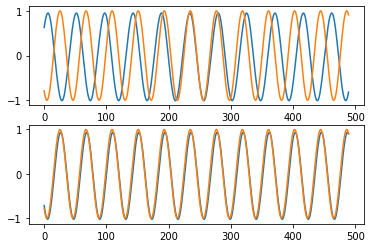

In [ ]:


plt.figure(1)
plt.subplot(211)
plt.plot(predicted)
plt.plot(y_test)
plt.subplot(212)
plt.plot(predicted1)
plt.plot(y_test)
plt.show()